<a href="https://colab.research.google.com/github/chidhambaram55/Image-Classification/blob/master/Copy_of_facemask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Apr 10 13:58:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip '/content/drive/My Drive/facemask/observations-master.zip' -d '/content/drive/My Drive/custom'

Archive:  /content/drive/My Drive/facemask/observations-master.zip
cdcf4501bf7fdec7ac8a4ee245e343b187fa53c7
   creating: /content/drive/My Drive/custom/observations-master/
  inflating: /content/drive/My Drive/custom/observations-master/README.md  
   creating: /content/drive/My Drive/custom/observations-master/experiements/
   creating: /content/drive/My Drive/custom/observations-master/experiements/data/
   creating: /content/drive/My Drive/custom/observations-master/experiements/data/with_mask/
  inflating: /content/drive/My Drive/custom/observations-master/experiements/data/with_mask/0-with-mask.jpg  
  inflating: /content/drive/My Drive/custom/observations-master/experiements/data/with_mask/1-with-mask.jpg  
  inflating: /content/drive/My Drive/custom/observations-master/experiements/data/with_mask/10-with-mask.jpg  
  inflating: /content/drive/My Drive/custom/observations-master/experiements/data/with_mask/100-with-mask.jpg  
  inflating: /content/drive/My Drive/custom/observatio

In [ ]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive


In [ ]:

import cv2,os

data_path='facemask/custom/observations-master/experiements/data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to

In [ ]:

import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:

np.save('data',data)
np.save('target',new_target)

In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: ignored

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 52900)            

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

model.save('model-017.model')

Epoch 1/20
31/31 [==============================] - 1s 25ms/step - loss: 0.0101 - accuracy: 0.9990 - val_loss: 0.1286 - val_accuracy: 0.9718
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0117 - accuracy: 0.9949 - val_loss: 0.1372 - val_accuracy: 0.9677
Epoch 3/20
31/31 [==============================] - 1s 23ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.1075 - val_accuracy: 0.9718
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 1s 23ms/step - loss: 0.0128 - accuracy: 0.9949 - val_loss: 0.1863 - val_accuracy: 0.9718
Epoch 5/20
31/31 [==============================] - 1s 23ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.2133 - val_accuracy: 0.9597
Epoch 6/20
31/31 [==============================] - 1s 24ms/step - loss: 0.0293 - accuracy: 0.9899 - val_loss: 0.1137 - val_accuracy: 0.9718
Epoch 7/20
31/31 [====================

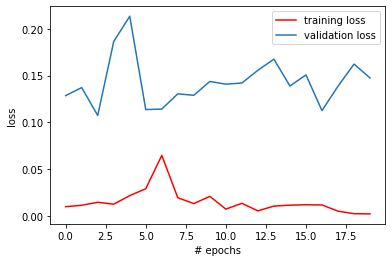

In [ ]:
# testing from here
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.4977
[0.690768837928772, 0.52173912525177]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

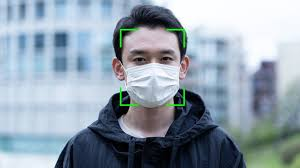

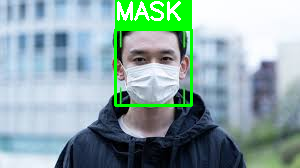

In [ ]:
model = load_model('model-017.model')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
#input_file_path = "facemask/custom/observations-master/experiements/data/with_mask/407-with-mask.jpg"

input_file_path = "mask1.jpg"
img = cv2.imread(input_file_path)

cv2_imshow(img)
(h, w) = img.shape[:2]
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 6)
for (x,y,w,h) in faces:
    
  face_img=gray[y:y+w,x:x+w]
  resized=cv2.resize(face_img,(100,100))
  normalized=resized/255.0
  reshaped=np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)

  label=np.argmax(result,axis=1)[0]
      
  cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
  cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
  cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
  cv2_imshow(img)

  


cv2.destroyAllWindows()